In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("CompleteDataSet.csv",low_memory=False,skiprows=[1])

In [3]:
data=df[['BeltAccelerometer', 'Unnamed: 16',
       'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20','Activity']]



In [4]:
data["BeltAccelerometer"]=data["BeltAccelerometer"].astype("float")
data["Unnamed: 16"]=data["Unnamed: 16"].astype("float")
data["Unnamed: 17"]=data["Unnamed: 17"].astype("float")
data["BeltAngularVelocity"]=data["BeltAngularVelocity"].astype("float")
data["Unnamed: 19"]=data["Unnamed: 19"].astype("float")
data["Unnamed: 20"]=data["Unnamed: 20"].astype("float")
data["Activity"]=data["Activity"].astype("float")


C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rupali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [5]:
Walking=data[data["Activity"]==6].head(8872)
Standing=data[data["Activity"]==7].head(8872)
Sitting=data[data["Activity"]==8].head(8872)
Laying=data[data["Activity"]==11].head(8872)
Jumping=data[data["Activity"]==10].head(8872)
Falling_sideways=data[data["Activity"]==4].head(8872)
Falling_backwards=data[data["Activity"]==3].head(8872)
Falling_forward_using_hands=data[data["Activity"]==1].head(8872)
Falling_forward_using_knees=data[data["Activity"]==2].head(8872)
Falling_sitting_in_empty_chair=data[data["Activity"]==5].head(8872)
Picking_up_an_object=data[data["Activity"]==9].head(8872)


In [6]:
bal_data=pd.DataFrame()
bal_data=bal_data.append([Walking,Standing,Sitting,Laying,Jumping,Falling_sideways,Falling_backwards,
                          Falling_forward_using_hands,Falling_forward_using_knees,Falling_sitting_in_empty_chair,
                          Picking_up_an_object])
print(bal_data["Activity"].value_counts())
np.shape(bal_data)

7.0     8872
5.0     8872
9.0     8872
4.0     8872
11.0    8872
3.0     8872
10.0    8872
2.0     8872
1.0     8872
8.0     8872
6.0     8872
Name: Activity, dtype: int64


(97592, 7)

In [7]:
x=bal_data[['BeltAccelerometer', 'Unnamed: 16',
       'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20']]
y=bal_data["Activity"]

In [8]:
bal_data

,BeltAccelerometer,Unnamed: 16,Unnamed: 17,BeltAngularVelocity,Unnamed: 19,Unnamed: 20,Activity
2832,0.125,0.909,0.526,34.451,-8.354,-33.232,6.0
2833,0.280,1.057,0.640,-31.463,-24.024,-0.549,6.0
2834,0.280,1.057,0.640,1.220,-26.524,27.927,6.0
2835,0.335,1.095,0.394,34.634,-10.427,16.280,6.0
2836,0.335,1.095,0.394,-58.171,5.000,-2.744,6.0
...,...,...,...,...,...,...,...
289935,-0.841,0.420,-0.367,3.415,-0.732,1.402,9.0
289936,-0.838,0.424,-0.366,2.866,-0.488,1.220,9.0
289937,-0.838,0.424,-0.366,0.793,-1.220,0.122,9.0
289938,-0.838,0.418,-0.371,1.768,-0.488,0.732,9.0


In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
import tensorflow as tf
from focal_loss import BinaryFocalLoss
from tensorflow.keras.optimizers import Adam

In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
bal_data['label'] = label.fit_transform(bal_data['Activity'])
bal_data.head()

,BeltAccelerometer,Unnamed: 16,Unnamed: 17,BeltAngularVelocity,Unnamed: 19,Unnamed: 20,Activity,label
2832,0.125,0.909,0.526,34.451,-8.354,-33.232,6.0,5
2833,0.280,1.057,0.640,-31.463,-24.024,-0.549,6.0,5
2834,0.280,1.057,0.640,1.220,-26.524,27.927,6.0,5
2835,0.335,1.095,0.394,34.634,-10.427,16.280,6.0,5
2836,0.335,1.095,0.394,-58.171,5.000,-2.744,6.0,5


In [11]:
label.classes_

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [12]:
bal_data['label'].value_counts()

10    8872
9     8872
8     8872
7     8872
6     8872
5     8872
4     8872
3     8872
2     8872
1     8872
0     8872
Name: label, dtype: int64

In [13]:
X = bal_data[['BeltAccelerometer', 'Unnamed: 16',
       'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20']]
y = bal_data['label']

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['BeltAccelerometer', 'Unnamed: 16',
       'Unnamed: 17', 'BeltAngularVelocity', 'Unnamed: 19', 'Unnamed: 20'])
scaled_X['label'] = y.values

scaled_X

,BeltAccelerometer,Unnamed: 16,Unnamed: 17,BeltAngularVelocity,Unnamed: 19,Unnamed: 20,label
0,0.282292,1.383322,0.568042,0.384053,-0.079521,-0.458300,5
1,0.609097,1.579891,0.738009,-0.387567,-0.231992,-0.025111,5
2,0.609097,1.579891,0.738009,-0.004965,-0.256317,0.352317,5
3,0.725060,1.630361,0.371238,0.386195,-0.099691,0.197945,5
4,0.725060,1.630361,0.371238,-0.700223,0.050415,-0.054204,5
...,...,...,...,...,...,...,...
97587,-1.754439,0.733846,-0.763366,0.020731,-0.005358,0.000748,8
97588,-1.748113,0.739158,-0.761875,0.014304,-0.002984,-0.001664,8
97589,-1.748113,0.739158,-0.761875,-0.009963,-0.010106,-0.016217,8
97590,-1.748113,0.731189,-0.769330,0.001450,-0.002984,-0.008132,8


In [15]:
import scipy.stats as stats
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [16]:
def get_frames(exp, frame_size, hop_size):

    N_FEATURES = 6

    frames = []
    labels = []
    for i in range(0, len(exp) - frame_size, hop_size):
        x = exp['BeltAccelerometer'].values[i: i + frame_size]
        y = exp['Unnamed: 16'].values[i: i + frame_size]
        z = exp['Unnamed: 17'].values[i: i + frame_size]
        p = exp['BeltAngularVelocity'].values[i: i + frame_size]
        q = exp['Unnamed: 19'].values[i: i + frame_size]
        r = exp['Unnamed: 20'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(exp['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z, p, q, r])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [17]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [18]:
X.shape, y.shape

((2438, 80, 6), (2438,))

In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [20]:
X_train[0].shape

(80, 6)

In [21]:
X_train=X_train.reshape(-1,80,6,1)
X_test=X_test.reshape(-1,80,6,1)

In [22]:
X_train[0].shape

(80, 6, 1)

In [23]:
X_test[0].shape

(80, 6, 1)

In [24]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
def getModel():
    model = Sequential()
    model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(11, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [25]:
X_train[0].shape

(80, 6, 1)

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier

In [27]:
estimator = KerasClassifier(build_fn=getModel, epochs=10, batch_size=5, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/10
307/307 [==============================] - 9s 13ms/step - loss: 1.9806 - accuracy: 0.3150
Epoch 2/10
307/307 [==============================] - 4s 12ms/step - loss: 1.3547 - accuracy: 0.5425
Epoch 3/10
307/307 [==============================] - 4s 12ms/step - loss: 1.1930 - accuracy: 0.5765
Epoch 4/10
307/307 [==============================] - 4s 12ms/step - loss: 1.0107 - accuracy: 0.6460
Epoch 5/10
307/307 [==============================] - 4s 13ms/step - loss: 0.9360 - accuracy: 0.6696
Epoch 6/10
307/307 [==============================] - 4s 13ms/step - loss: 0.8847 - accuracy: 0.6810
Epoch 7/10
307/307 [==============================] - 4s 14ms/step - loss: 0.8137 - accuracy: 0.6910
Epoch 8/10
307/307 [==============================] - 4s 14ms/step - loss: 0.7743 - accuracy: 0.7408
Epoch 9/10
307/307 [==============================] - 4s 13ms/step - loss: 0.7316 - accuracy: 0.7416
Epoch 10/10
35/35 [==============================] - 1s 3ms/step - loss: 0.8723 - accuracy:

308/308 [==============================] - 4s 14ms/step - loss: 0.9929 - accuracy: 0.6476
Epoch 6/10
308/308 [==============================] - 4s 15ms/step - loss: 0.9560 - accuracy: 0.6558
Epoch 7/10
308/308 [==============================] - 4s 14ms/step - loss: 0.8840 - accuracy: 0.6653
Epoch 8/10
308/308 [==============================] - 4s 14ms/step - loss: 0.8735 - accuracy: 0.6993
Epoch 9/10
308/308 [==============================] - 4s 13ms/step - loss: 0.8485 - accuracy: 0.6958
Epoch 10/10
34/34 [==============================] - 0s 3ms/step - loss: 0.9418 - accuracy: 0.6529
Epoch 1/10
308/308 [==============================] - 5s 13ms/step - loss: 1.9927 - accuracy: 0.2805
Epoch 2/10
308/308 [==============================] - 4s 14ms/step - loss: 1.3031 - accuracy: 0.5413
Epoch 3/10
308/308 [==============================] - 4s 14ms/step - loss: 1.1157 - accuracy: 0.5949
Epoch 4/10
308/308 [==============================] - 4s 14ms/step - loss: 0.9668 - accuracy: 0.6176
Epo

In [28]:
for i in range(10):
    estimator.fit(X_train,y_train,verbose=1)

Epoch 1/10
342/342 [==============================] - 5s 13ms/step - loss: 2.1132 - accuracy: 0.2583
Epoch 2/10
342/342 [==============================] - 4s 13ms/step - loss: 1.3993 - accuracy: 0.4810
Epoch 3/10
342/342 [==============================] - 5s 14ms/step - loss: 1.1974 - accuracy: 0.5709 0s - loss: 1.1993 - accura
Epoch 4/10
342/342 [==============================] - 5s 14ms/step - loss: 1.0306 - accuracy: 0.6279
Epoch 5/10
342/342 [==============================] - 4s 13ms/step - loss: 0.9005 - accuracy: 0.6758
Epoch 6/10
342/342 [==============================] - 5s 14ms/step - loss: 0.9235 - accuracy: 0.6831
Epoch 7/10
342/342 [==============================] - 4s 13ms/step - loss: 0.8076 - accuracy: 0.7055
Epoch 8/10
342/342 [==============================] - 5s 14ms/step - loss: 0.7764 - accuracy: 0.7345 0s -
Epoch 9/10
342/342 [==============================] - 4s 13ms/step - loss: 0.7762 - accuracy: 0.7270
Epoch 10/10
342/342 [==============================] - 5s 1

Epoch 1/10
342/342 [==============================] - 5s 13ms/step - loss: 2.0130 - accuracy: 0.2987
Epoch 2/10
342/342 [==============================] - 4s 13ms/step - loss: 1.3954 - accuracy: 0.5193
Epoch 3/10
342/342 [==============================] - 4s 13ms/step - loss: 1.1938 - accuracy: 0.5712
Epoch 4/10
342/342 [==============================] - 5s 13ms/step - loss: 1.0616 - accuracy: 0.6041
Epoch 5/10
342/342 [==============================] - 5s 13ms/step - loss: 0.9673 - accuracy: 0.6446
Epoch 6/10
342/342 [==============================] - 5s 13ms/step - loss: 0.9194 - accuracy: 0.6769
Epoch 7/10
342/342 [==============================] - 5s 13ms/step - loss: 0.8134 - accuracy: 0.6903
Epoch 8/10
342/342 [==============================] - 5s 13ms/step - loss: 0.7956 - accuracy: 0.6965
Epoch 9/10
342/342 [==============================] - 5s 13ms/step - loss: 0.7255 - accuracy: 0.7459 0s - loss: 0.7249 - accuracy: 0.
Epoch 10/10
342/342 [==============================] - 5s 

In [29]:
y_pred=estimator.predict(X_test)

C:\Users\Rupali\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


147/147 [==============================] - 1s 3ms/step


In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

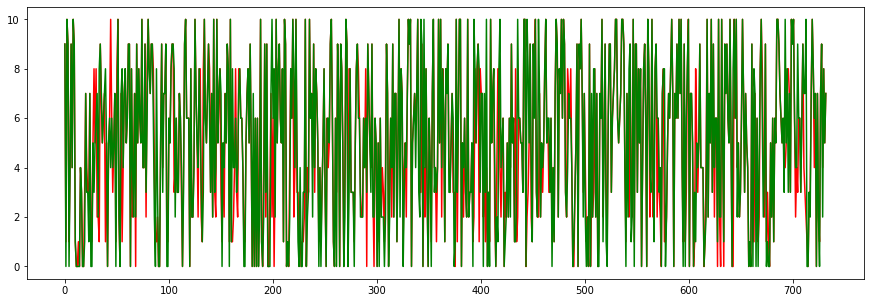

In [31]:
plt.figure(figsize=(15,5))

t=np.linspace(0,732,732)
plt.plot(t,y_test,"r")
plt.plot(t,y_pred,"g")




In [32]:
m=cm/cm.sum(axis=1)
cm=np.around(m,3)

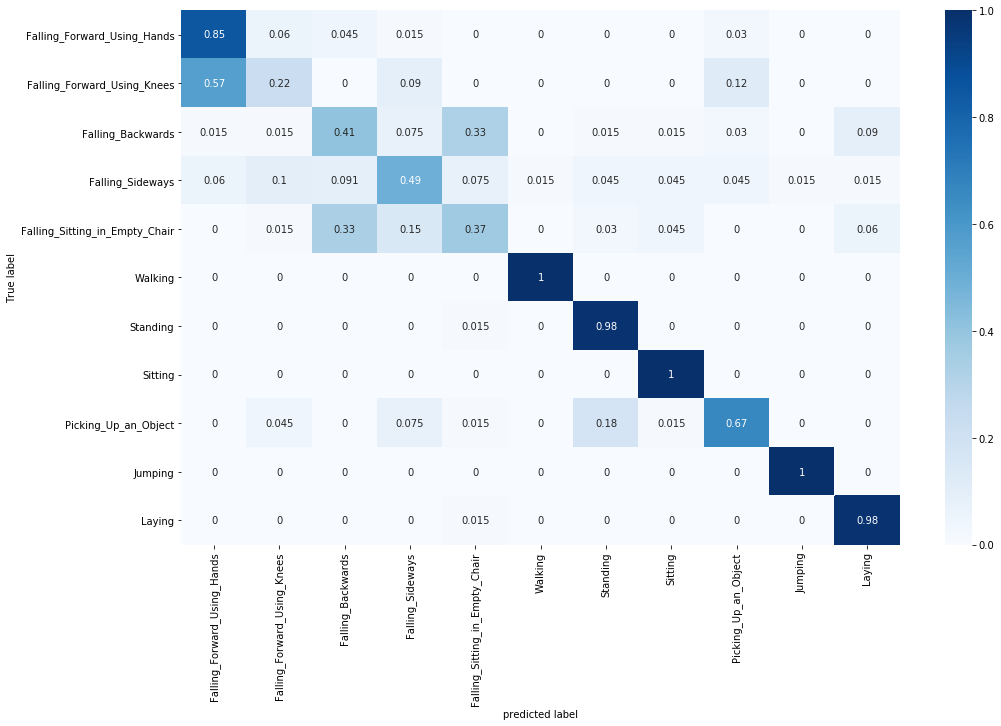

In [33]:
import seaborn as sns
axis_labels = ['Falling_Forward_Using_Hands','Falling_Forward_Using_Knees','Falling_Backwards','Falling_Sideways','Falling_Sitting_in_Empty_Chair','Walking','Standing','Sitting','Picking_Up_an_Object','Jumping','Laying']
figure = plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, xticklabels=axis_labels, yticklabels=axis_labels)
plt.ylim(len(cm),0,0)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('predicted label')
plt.show()